<a href="https://colab.research.google.com/github/Merostoroloji/VC/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hi")

hi


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# **Regression**

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu)/ sigma
X_test = (X_test - mu) / sigma

In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 100)

In [7]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
mdl.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 2767.8914 - mape: 37.0025


[2767.891357421875, 37.002506256103516]

In [ ]:
y_pred = mdl.predict(X_test)
y_pred

In [14]:
from sklearn.datasets import load_breast_cancer

In [15]:
data = load_breast_cancer()

# **Classification**

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu)/ sigma
X_test = (X_test - mu) / sigma

In [ ]:
X_test

In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 100)

In [21]:
mdl.evaluate(X_test, y_test)

3/3 [==============================] - 1s 5ms/step - loss: -17823802.0000 - accuracy: 0.0000e+00


[-17823802.0, 0.0]

In [ ]:
y_pred = mdl.predict(X_test)
y_pred_lable = (y_pred < .5).astype("int")
y_pred_lable

# **Multi Class**

In [26]:
from sklearn.datasets import load_iris

data = load_iris()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu)/ sigma
X_test = (X_test - mu) / sigma

In [ ]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(3, activation = "softmax"))

mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 100)
#sparse ekledik çünkü one-hot encoded bekler categorical cross entropy fakat bizim datamız one-hotlanmamıştı

In [29]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

1/1 [==============================] - 0s 218ms/step


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [30]:
data = pd.read_csv("Boston_Data.csv")
X = data.drop("medv", axis = 1)
y = data["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
print(X_train.shape)

(404, 13)


In [47]:
mdl = keras.Sequential()
mdl.add(layers.Dense(512, activation = "relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

early_stops = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 30) #50 iterasyon sonucu hala daha iyiyegitmiyorsa durdur

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
history = mdl.fit(X_train, y_train, epochs = 1000, verbose= 0, validation_split = 0.1, callbacks = [early_stops])
print(mdl.evaluate(X_train, y_train))
print(mdl.evaluate(X_test, y_test))

13/13 [==============================] - 0s 3ms/step - loss: 5.9936 - mape: 8.3360
[5.9936113357543945, 8.336030006408691]
4/4 [==============================] - 0s 4ms/step - loss: 11.5591 - mape: 11.3503
[11.559144020080566, 11.350340843200684]


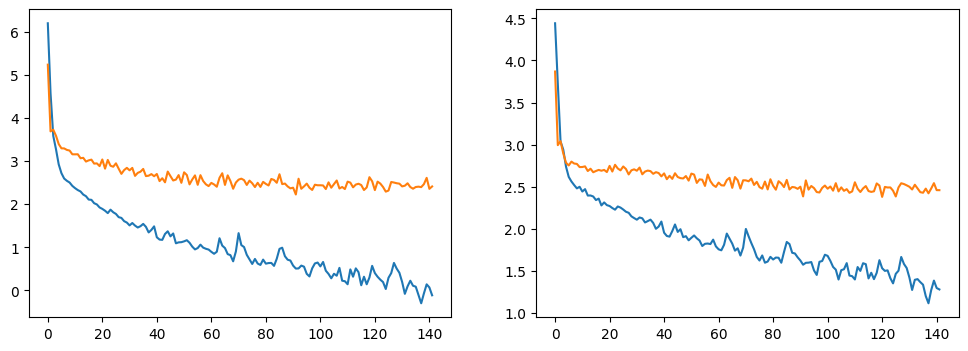

In [40]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(np.log(history.history["loss"]))

plt.plot(np.log(history.history["val_loss"]))

plt.subplot(1,2,2)
plt.plot(np.log(history.history["mape"]))
plt.plot(np.log(history.history["val_mape"]))

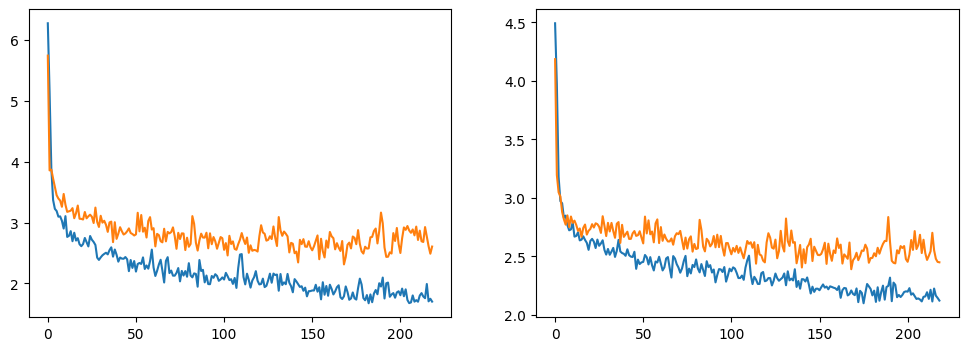

In [43]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(np.log(history.history["loss"]))

plt.plot(np.log(history.history["val_loss"]))

plt.subplot(1,2,2)
plt.plot(np.log(history.history["mape"]))
plt.plot(np.log(history.history["val_mape"]))

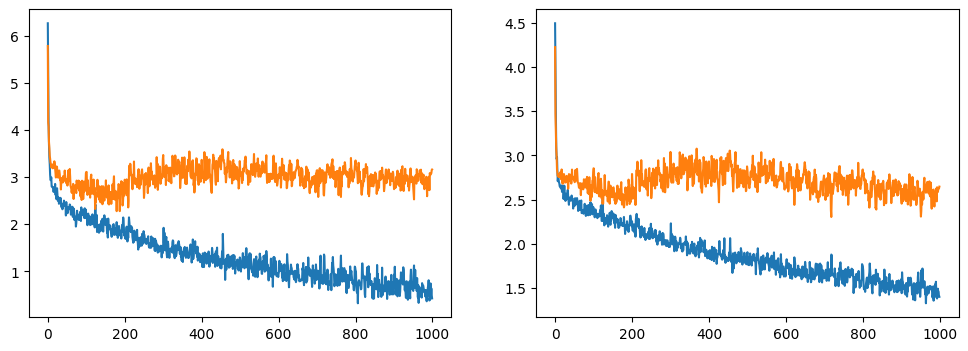

In [45]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(np.log(history.history["loss"]))

plt.plot(np.log(history.history["val_loss"]))

plt.subplot(1,2,2)
plt.plot(np.log(history.history["mape"]))
plt.plot(np.log(history.history["val_mape"]))

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


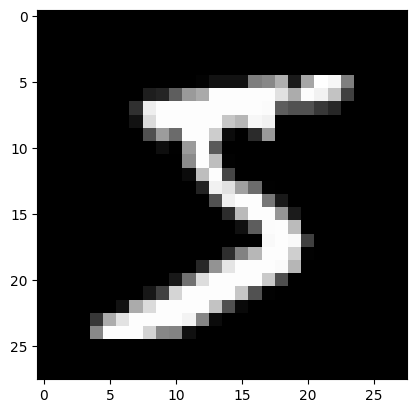

In [4]:
plt.imshow(X_train[0], "gray")
print(y_train[0])

In [6]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)

(60000, 784)


In [7]:
mdl = keras.Sequential()
mdl.add(layers.Dense(256, activation = "relu", input_shape=[X_train.shape[1],]))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

mdl.fit(X_train, y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2131 - accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0940 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0672 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0496 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0411 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0279 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [8]:
mdl.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0892 - accuracy: 0.9803


[0.08918945491313934, 0.9803000092506409]

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [5]:
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

X_train = X_train / 255.0
X_test = X_test / 255.0


In [11]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
mdl = keras.Sequential()
mdl.add(layers.Conv2D(128, kernel_size = (3,3), activation = "relu", input_shape = X_train.shape[1:] ))
mdl.add(layers.MaxPool2D(pool_size = (2,2)))
mdl.add(layers.Conv2D(64, kernel_size = (3,3), activation = "relu"))
mdl.add(layers.MaxPool2D(pool_size = (2,2)))
mdl.add(layers.Flatten())
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.1233 - accuracy: 0.9617
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0252 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0192 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0112 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0119 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

In [7]:
  mdl.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0512 - accuracy: 0.9900


[0.05119717866182327, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step


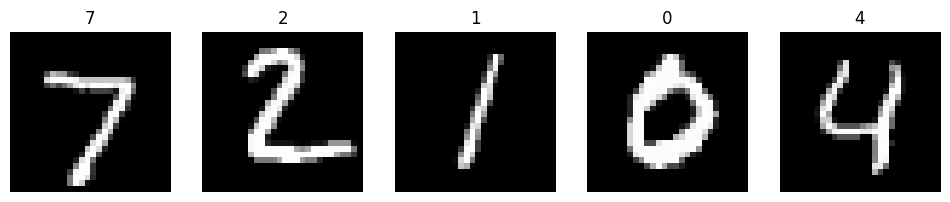

In [9]:
y_pred = mdl.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)
plt.figure(figsize=(12,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(X_test[i].reshape(28,28), "gray")
  plt.title(y_pred_label[i])
  plt.axis("off")

Correct : 3
Predicted : 8


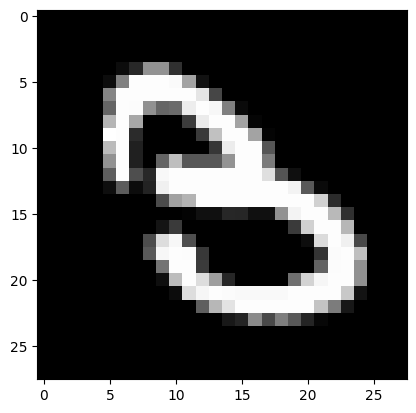

In [12]:
ix = y_pred_label != y_test
plt.imshow(X_test[ix][0].reshape(28,28), "gray")
print("Correct :", y_test[ix][0])
print("Predicted :", y_pred_label[ix][0])

<BarContainer object of 10 artists>

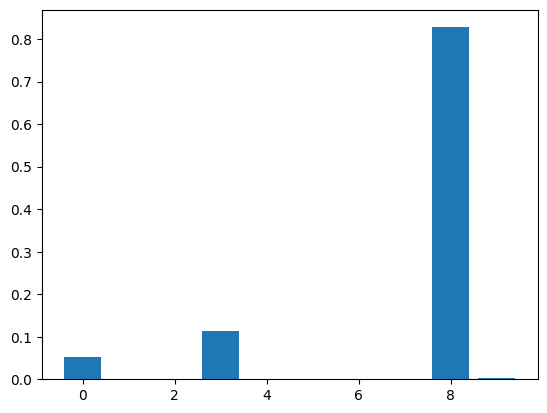

In [14]:
plt.bar(np.arange(10), y_pred[ix][0])

# **Recurrent**

In [15]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


<Axes: >

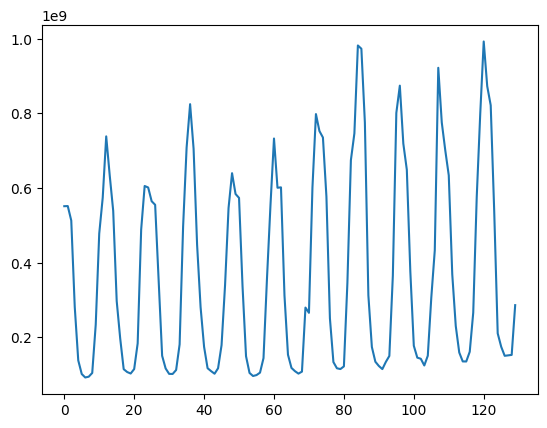

In [17]:
consumption = df["Consumption"]
consumption.plot()

In [18]:
mu = consumption[:-12].mean()
sigma =consumption[:-12].std()

<Axes: >

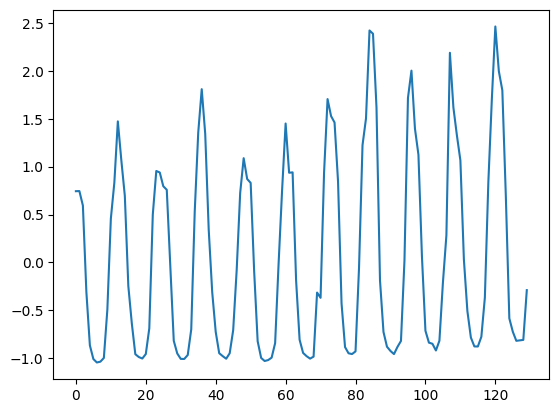

In [19]:
consumption = (consumption-mu)/sigma
consumption.plot()

In [30]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag])

    return np.array(X), np.array(y)

X, y = make_data(consumption.values, lag = 5)
X = X[..., np.newaxis]
print(X.shape)
print(y.shape)

(125, 5, 1)
(125,)


In [31]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

1/1 [==============================] - 0s 400ms/step - loss: 0.1458 - mae: 0.2928
[0.1458362638950348, 0.29277804493904114]


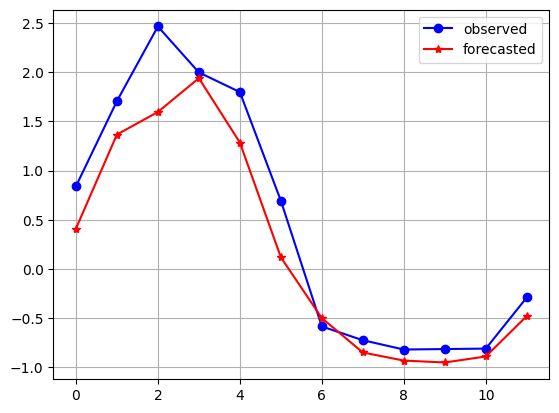

In [32]:
mdl = keras.Sequential()
mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:] ))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

ypred = mdl.predict(X_test)
print(mdl.evaluate(X_test, y_test))

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

In [33]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [37]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(X_train.shape[1], activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse", metrics=["mae"] )
mdl.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 20.3008 - mae: 3.6541
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 20.2774 - mae: 3.6514
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 20.2774 - mae: 3.6514
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 20.2774 - mae: 3.6514


313/313 [==============================] - 1s 3ms/step


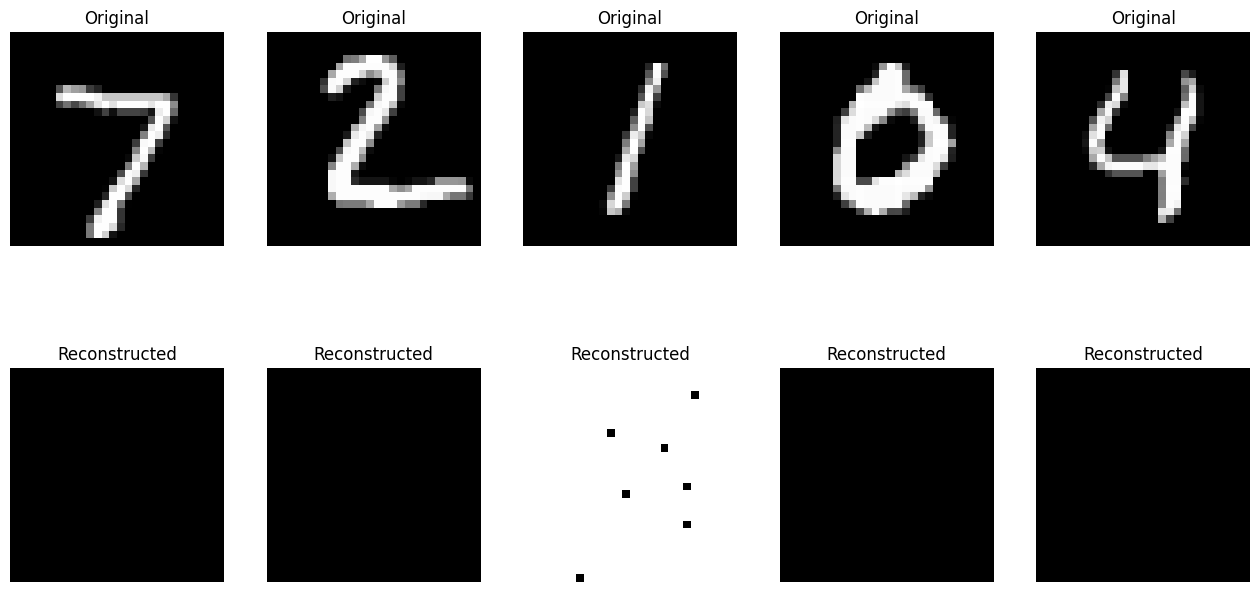

In [39]:


Xpred = mdl.predict(X_test)
plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,5, i + 1 + 5)
    plt.imshow(Xpred[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")

In [41]:
X_train_noisy = X_train + np.random.normal(size = X_train.shape) * 0.2
X_test_noisy = X_test + np.random.normal(size = X_test.shape) * 0.2

In [42]:
X_train_noisy =np.clip(X_train_noisy,0,1)
X_test_noisy =np.clip(X_test_noisy,0,1)

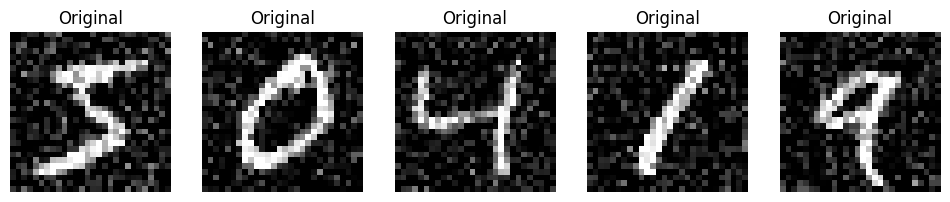

In [43]:



plt.figure(figsize = (12,8))

for i in range(5):
    plt.subplot(1,5, i + 1)
    plt.imshow(X_train_noisy[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")



In [50]:
mdl = keras.Sequential()
mdl.add(layers.Dense(128, activation = "relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(32, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(X_train.shape[1], activation = "sigmoid"))

mdl.compile(optimizer = "adam", loss = "mse", metrics=["mae"] )
mdl.fit(X_train_noisy,X_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0339 - mae: 0.0831
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - mae: 0.0541
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0163 - mae: 0.0473


313/313 [==============================] - 1s 2ms/step


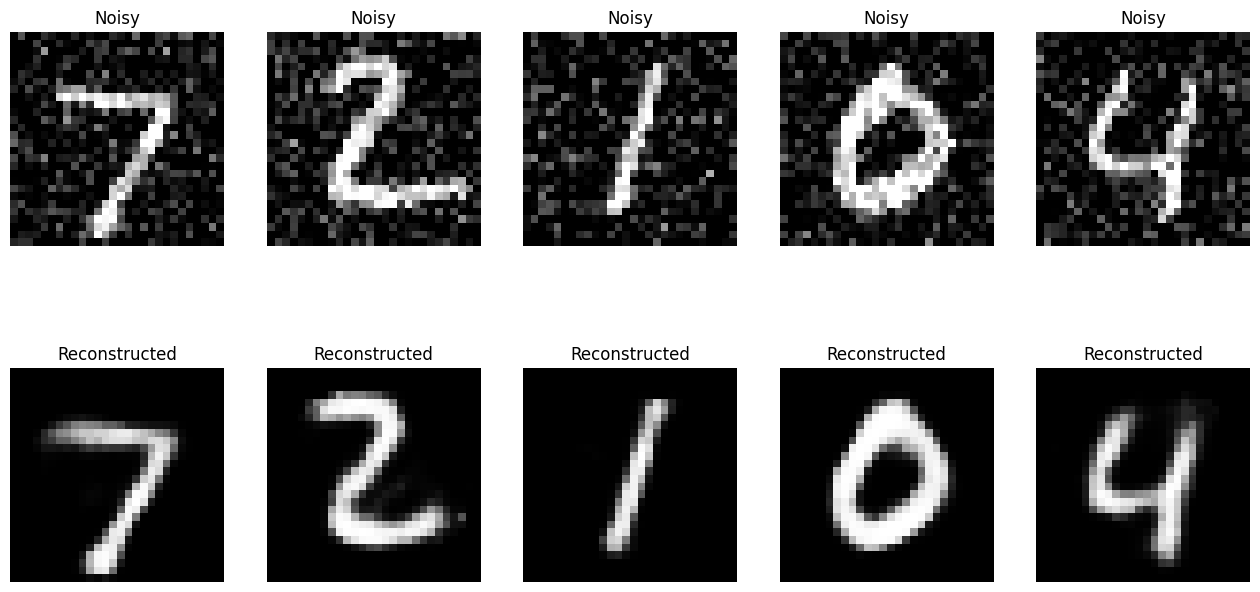

In [51]:


Xpred = mdl.predict(X_test_noisy)

plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28,28), "gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(2,5, i + 1 + 5)
    plt.imshow(Xpred[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")